In [1]:
from utils.models import *
from utils.model_tools import *

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch.utils.data import TensorDataset, DataLoader, random_split

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [3]:
def visualize_attention_maps(latent_representations, attention_weights):
    # Visualization of attention in latent space
    # Assuming latent_representations is a list of vectors and attention_weights is a list of matrices
    for i, latent in enumerate(latent_representations):
        plt.figure(figsize=(6, 6))
        plt.title(f'Latent Space Attention')
        attention_map = attention_weights  # Attention map for this image/latent vector
        plt.imshow(attention_map, cmap='hot')  # Heatmap of attention
        plt.colorbar()
        plt.show()

In [4]:
# ok should look over the whole thing but then also examine certain areas

data_dir = 'data/face-north'
target_dir_name = 'frames'

transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
])

dataset = HeadingDataset(source_directory=data_dir, 
                                 transform=transform)

loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)

Assuming already indexed files


In [10]:
model_file = 'model_files/facenorth_71884_samples-200ep-causal.pt'

model = PredictiveCoder()
model.load_state_dict(torch.load(model_file))
model.to(device)
model.eval()

PredictiveCoder(
  (encoder): ResNet18Enc(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlockEnc(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlockEnc(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

tensor([[0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)


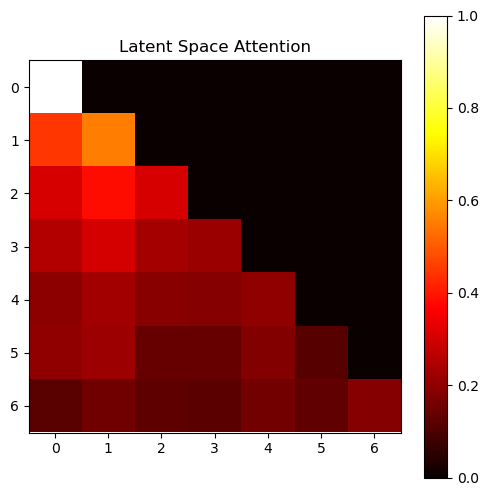

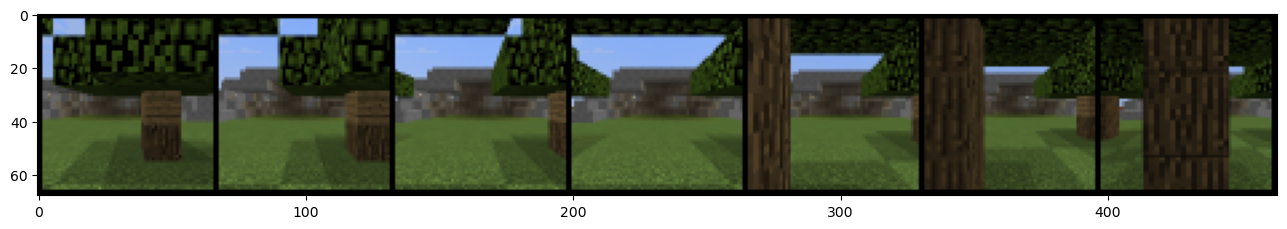

In [18]:
with torch.no_grad():
    for X, y in loader:
        X, headings = X
        print(headings)
        batch_size, sequence_length, c, h, w = X.size()
        x = X.view(batch_size * sequence_length, c, h, w).to(device)

        encoded_frames = model.encoder(x)
        encoded_frames = encoded_frames.view(batch_size, sequence_length, -1)
        z, weights = model.attn(encoded_frames)

        
        #if torch.all(torch.eq(headings, torch.tensor([[ 0.,    0., 0.,  0.,  0.,    0.,   0.]]))).item():
        break

weights = torch.squeeze(weights).cpu()
visualize_attention_maps(z, weights)

def imshow(img, fig_size=(16, 16)):
    plt.figure(figsize=fig_size)
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

X = torch.squeeze(X)
imshow(torchvision.utils.make_grid(X))

In [ ]:
# next thing would be to generate sequences of moving forward one way and moving side to side?

## Analyze the distance errors between baseline models  

In [ ]:
data_random_pairs = 

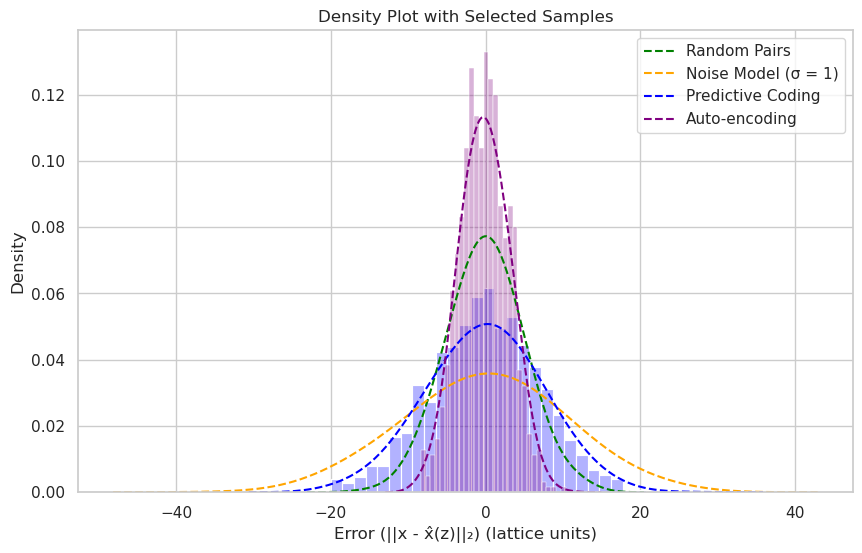

In [25]:
import seaborn as sns

# Assuming that the data is normally distributed, we can generate some sample data for illustration
np.random.seed(10)
data_random_pairs = np.random.normal(loc=0, scale=5, size=1000)
data_noise_model = np.random.normal(loc=0, scale=10, size=1000)
data_predictive_coding = np.random.normal(loc=0, scale=7, size=1000)
data_auto_encoding = np.random.normal(loc=0, scale=3, size=1000)

plt.figure(figsize=(10, 6))

# Plotting KDE for all distributions
sns.kdeplot(data_random_pairs, bw_adjust=2, label="Random Pairs", color="green", linestyle="--")
sns.kdeplot(data_noise_model, bw_adjust=2, label="Noise Model (σ = 1)", color="orange", linestyle="--")
sns.kdeplot(data_predictive_coding, bw_adjust=2, label="Predictive Coding", color="blue", linestyle="--")
sns.kdeplot(data_auto_encoding, bw_adjust=2, label="Auto-encoding", color="purple", linestyle="--")

# Plotting histograms only for predictive coding and auto-encoding with normalization
sns.histplot(data_predictive_coding, kde=False, color="blue", alpha=0.3, bins=30, stat="density")
sns.histplot(data_auto_encoding, kde=False, color="purple", alpha=0.3, bins=30, stat="density")

# Additional plot formatting to match the user's request
plt.title('Density Plot with Selected Samples')
plt.xlabel('Error (||x - x̂(z)||₂) (lattice units)')
plt.ylabel('Density')
plt.legend()
plt.show()
